In [31]:
# Importing required packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import io
import time
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

In [4]:
# function to read data as csv from nse india, it will contain daily data for all the stocks
def fetch_data(url):
    try:
        response = requests.get(url, timeout=1)
        data = pd.read_csv(url)
    except requests.exceptions.Timeout:
        data = pd.DataFrame()
    return data

In [5]:
# deciding import parameters for the analysis
start_date = '2023-01-01'
end_date = '2023-06-30'

# get all business days between certain start and end dates
business_days = pd.bdate_range(start_date, end_date)

# fetch data for all the business days
final_data = pd.DataFrame()
for i in range(len(business_days)):
    date = business_days[i]
    day = '{:02d}'.format(date.day)
    month = '{:02d}'.format(date.month)
    year = str(date.year)
    url = f"https://archives.nseindia.com/products/content/sec_bhavdata_full_{day}{month}{year}.csv"
    df = fetch_data(url)
    df.columns = [col.strip() for col in df.columns]
    if pd.to_datetime(df["DATE1"])[0] == date:
        df = df[df["SERIES"] == " EQ"]
        df = df.drop("SERIES", axis=1)
        df["DATE1"] = pd.to_datetime(df["DATE1"])
        final_data = pd.concat([final_data, df], axis=0)

In [10]:
# get most active traded stocks
top_100_stocks = list(final_data.groupby("SYMBOL")["TURNOVER_LACS"].sum().sort_values(ascending=False).head(100).index)

In [23]:
# Logic of 44 Moving Average Study
#1) Stock price should be very close to 44 SMA
#2) Trend of Moving Average should be increasing in nature (we will decide trend based on last 10 values of the price)

test = final_data[final_data["SYMBOL"] == top_100_stocks[0]]
test["DATE1"] = pd.to_datetime(test["DATE1"])
test = test.sort_values(by="DATE1").set_index("DATE1")
test["44SMA"] = test["CLOSE_PRICE"].rolling(window=44).mean()
test.rename(columns={"OPEN_PRICE": "Open", "HIGH_PRICE": "High", "LOW_PRICE": "Low", "CLOSE_PRICE": "Close", 
                     "TURNOVER_LACS": "Volume"}, inplace=True)
test.head()

,SYMBOL,PREV_CLOSE,Open,High,Low,LAST_PRICE,Close,AVG_PRICE,TTL_TRD_QNTY,Volume,NO_OF_TRADES,DELIV_QTY,DELIV_PER,44SMA
DATE1,,,,,,,,,,,,,,
2023-01-02,HDFCBANK,1628.15,1627.0,1639.75,1618.55,1628.15,1628.70,1629.49,2190689,35696.97,89456,1036063,47.29,NaN
2023-01-03,HDFCBANK,1628.70,1622.2,1643.00,1622.20,1640.50,1639.35,1634.63,4189015,68474.96,102047,2754739,65.76,NaN
2023-01-04,HDFCBANK,1639.35,1635.0,1645.75,1607.00,1610.30,1610.05,1622.71,5175800,83988.38,164250,3271719,63.21,NaN
2023-01-05,HDFCBANK,1610.05,1615.0,1618.05,1589.40,1599.95,1599.70,1602.26,5470718,87655.09,193143,3582675,65.49,NaN
2023-01-06,HDFCBANK,1599.70,1602.0,1609.10,1578.20,1594.05,1594.40,1592.77,4546231,72410.80,147775,2919025,64.21,NaN


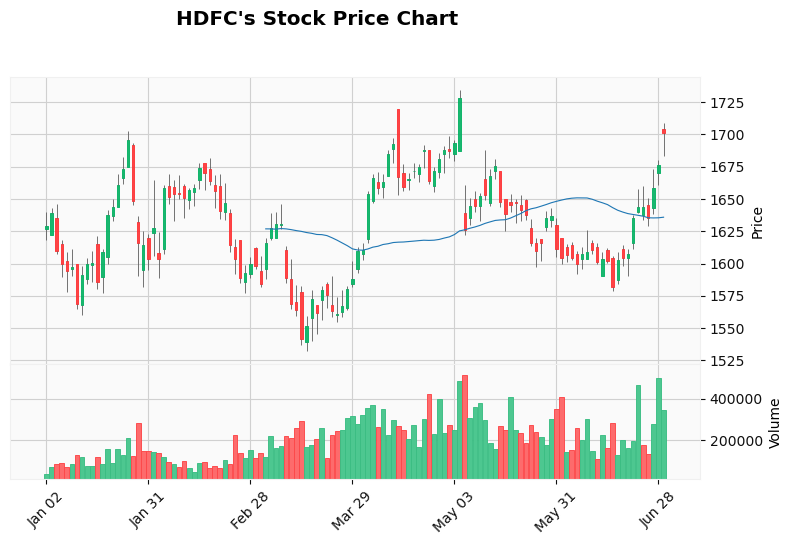

In [37]:
# Create candlestick chart using latest yaer data
plt.style.use("ggplot")
mpf.plot(test[["Open", "High", "Low", "Close", "Volume"]], type="candle", style="yahoo", volume=True,
        mav=(44), title="HDFC's Stock Price Chart", figratio=(20, 12))

In [ ]:
plt.plot()